# Import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset.

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Get the numbers of rows and columns.
df.shape

(32560, 15)

In [4]:
#Check column of the dataframe.
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
#Get the column datatypes.
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
#Basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#Get a count of the empty values for each column.
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
#Check any missing/null values in the dataset.
df.isnull().values.any()

False

<AxesSubplot:>

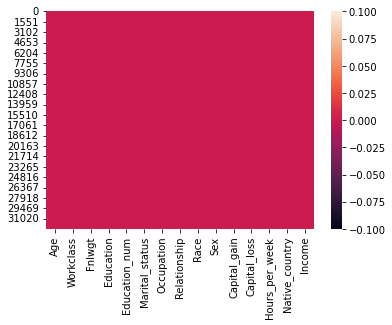

In [9]:
#Checking for null values using heatmap.
sns.heatmap(df.isnull())

In [10]:
#Print all of the data types and their unique values.
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
____________________________________________
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168

# Data Analysis and Visualization

In [11]:
#summary statistics.
df.describe().style.background_gradient()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,189781.814373,10.080590,1077.615172,87.306511,40.437469
std,13.640642,105549.764924,2.572709,7385.402999,402.966116,12.347618
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117831.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178363.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237054.500000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


Observation
Mean of Age, Fnlwgt, Capital_gain columns are geater than median, hence it is right skewed. Standard deviation is high in Fnlwgt,Capital_gain. It means data spread is high. high gap between 75th percentile and max is present in Fnlwgt and Capital_gain and Capital_loss so, few outlier is present.

<AxesSubplot:xlabel='Income', ylabel='count'>

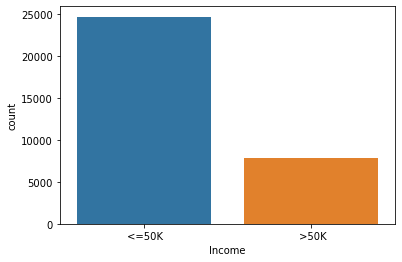

In [12]:
#Visualize the number of income.
sns.countplot(df['Income'])

<AxesSubplot:xlabel='Income', ylabel='count'>

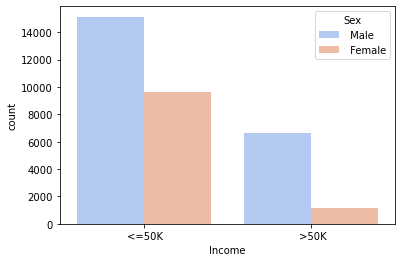

In [13]:
#Gender and Income.
sns.countplot(x='Income', hue='Sex', data=df, palette='coolwarm')

<AxesSubplot:xlabel='Income', ylabel='count'>

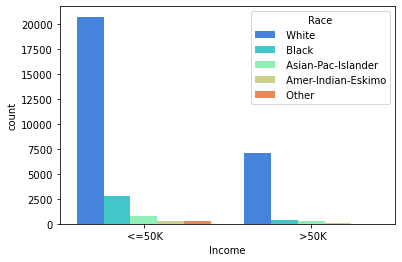

In [14]:
#Race and Income.
sns.countplot(x='Income', hue='Race', data=df, palette='rainbow')

<AxesSubplot:xlabel='Income', ylabel='count'>

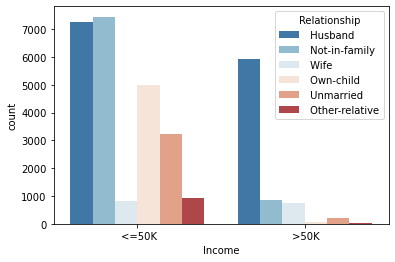

In [15]:
#Relationship and Income.
sns.countplot(x='Income', hue='Relationship', data=df, palette='RdBu_r')

In [16]:
#Replace ? values with mode
df['Workclass']= df['Workclass'].str.replace('?','Private')
df['Occupation'] = df['Occupation'].str.replace('?','Prof-specialty')
df['Native_country'] = df['Native_country'].str.replace('?','United-States')

Feature Engineering

In [17]:
df['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'school', inplace=True, regex=True)
df['Education'].replace('HS-grad','high school', inplace=True, regex=True)
df['Education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'], 'higher', inplace=True, regex=True)
df['Education'].replace('Bachelors','undergrad', inplace=True, regex=True)
df['Education'].replace('Masters','grad', inplace=True, regex=True)
df['Education'].replace('Doctorate','doc', inplace=True, regex=True)

In [18]:
df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'], 'married', inplace=True, regex=True)
df['Marital_status'].replace('Never-married','not-married', inplace=True, regex=True)
df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'], 'other', inplace=True, regex=True)

<AxesSubplot:xlabel='Income', ylabel='count'>

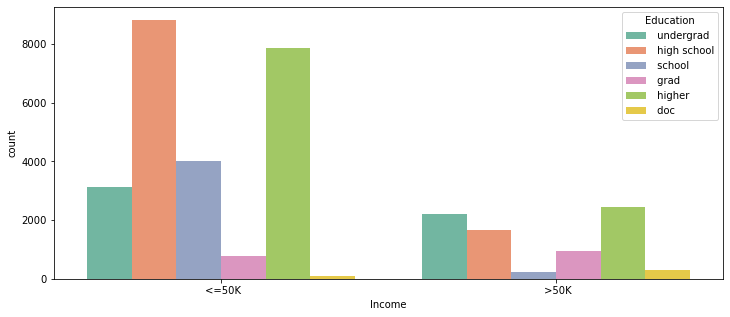

In [19]:
#Education and Income.
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Education', data=df, palette='Set2')

<AxesSubplot:xlabel='Income', ylabel='count'>

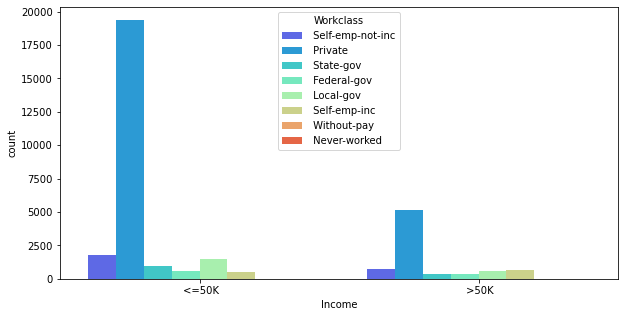

In [20]:
#Workclass and Income.
plt.figure(figsize=(10,5))
sns.countplot(x='Income', hue='Workclass', data=df, palette='rainbow')

<AxesSubplot:xlabel='Income', ylabel='count'>

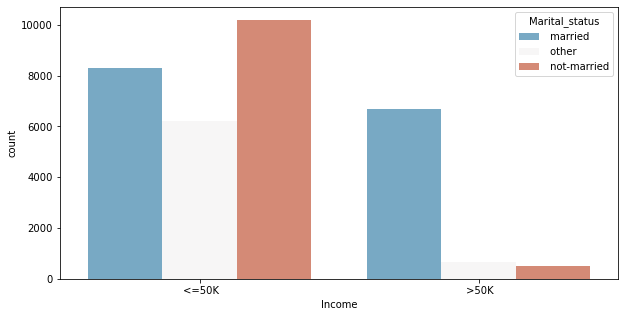

In [21]:
#Marital_status and Income.
plt.figure(figsize=(10,5))
sns.countplot(x='Income', hue='Marital_status', data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Income', ylabel='count'>

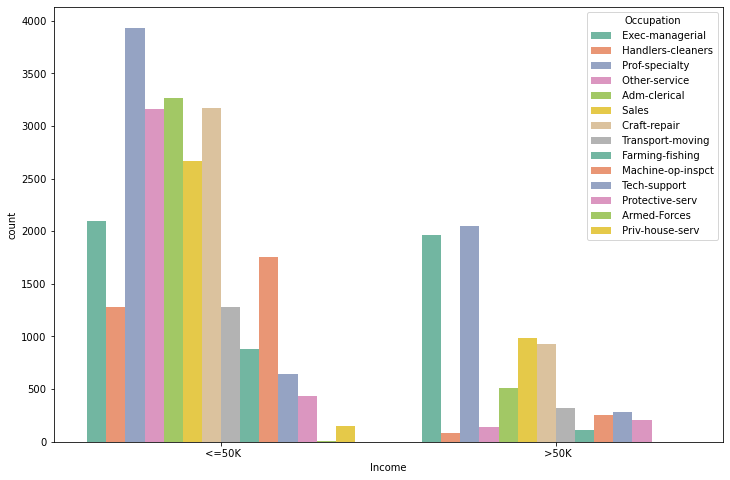

In [22]:
#Occupation and Income.
plt.figure(figsize=(12,8))
sns.countplot(x='Income', hue='Occupation', data=df, palette='Set2')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

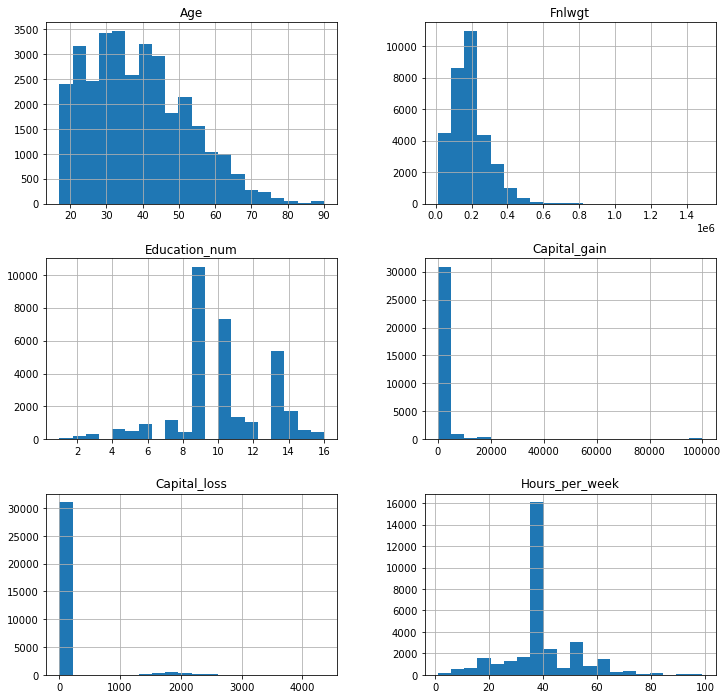

In [23]:
#display histogram of all columns.
df.hist(figsize=(12,12), layout=(3,2), sharex=False, bins=20)

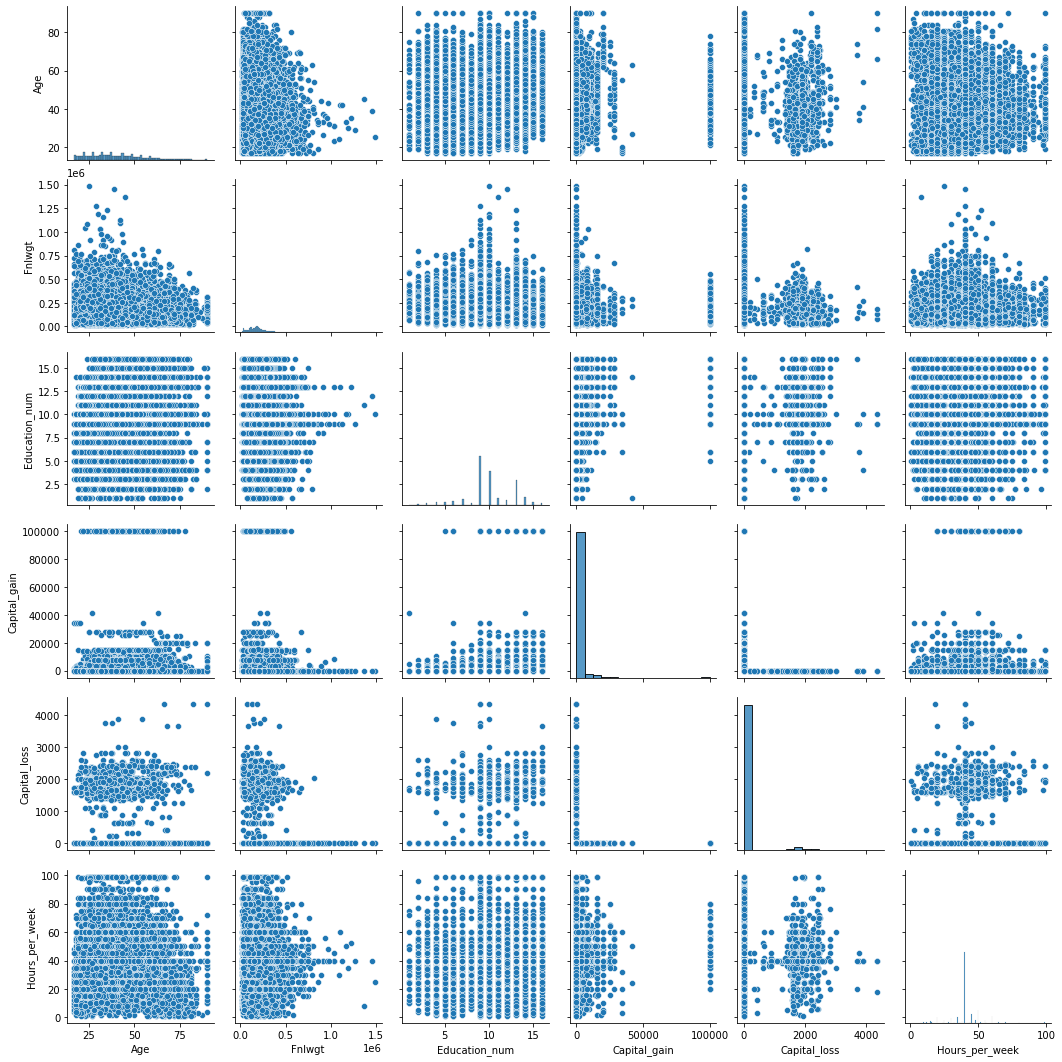

In [24]:
sns.pairplot(df)

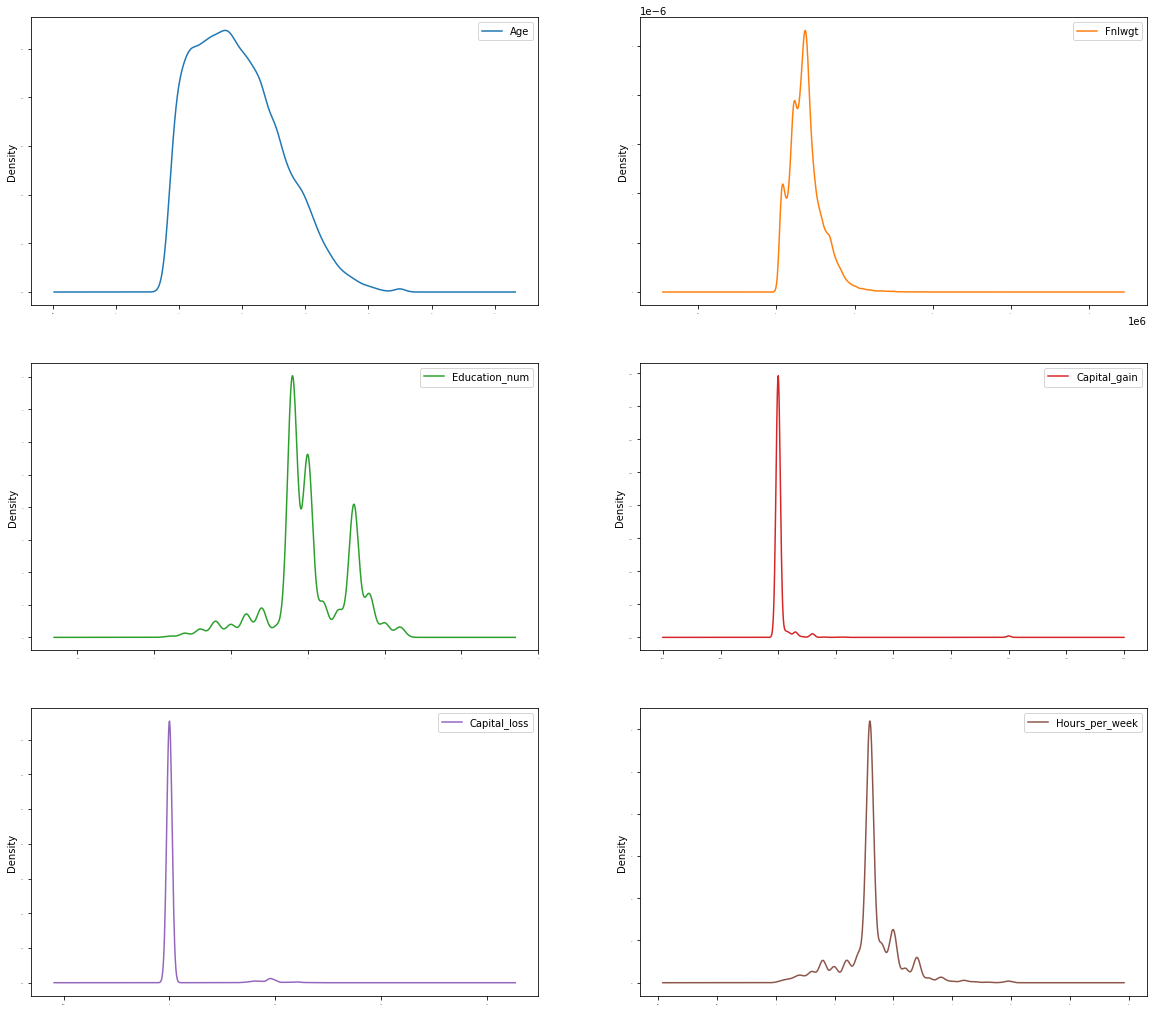

In [25]:
# Let's check the data distribution among all the columns.
df.plot(kind='density', subplots=True, layout=(3,2), sharex=False, legend=True, fontsize=1, figsize=(20,18))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

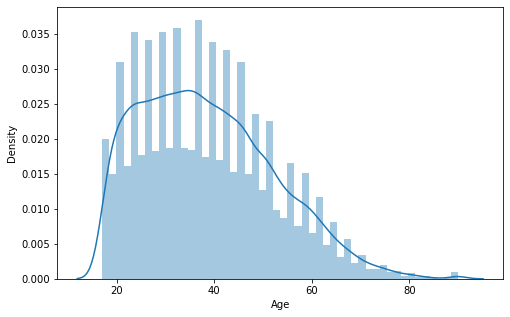

In [26]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

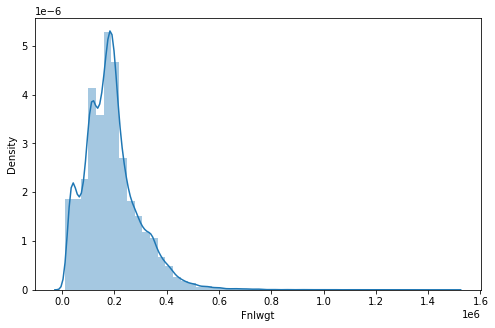

In [27]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

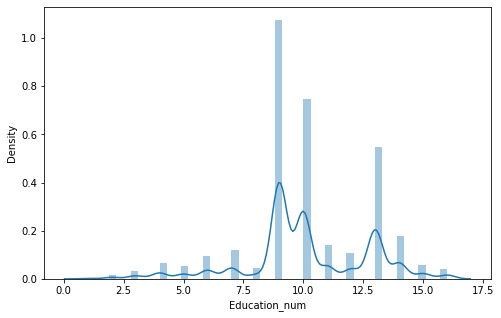

In [28]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Education_num'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

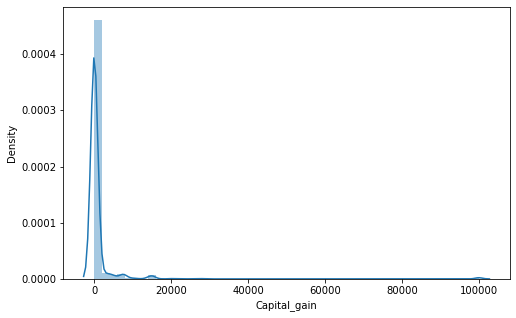

In [29]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

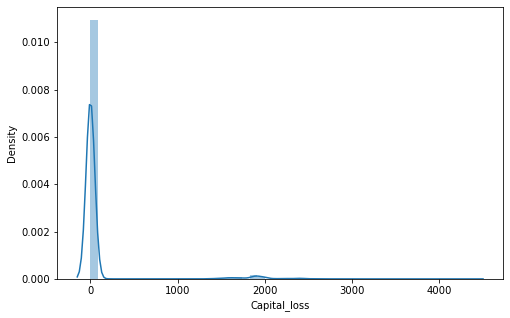

In [30]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

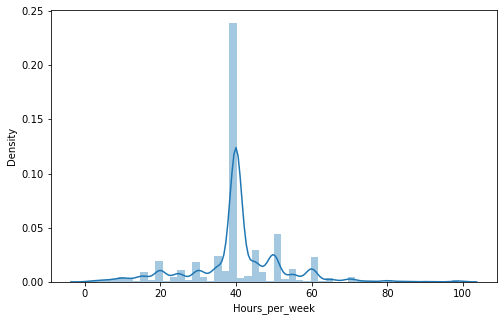

In [31]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Hours_per_week'])

# Remove skewness and outliers

In [32]:
#Check skewness
df.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Age                0.558738
Hours_per_week     0.227636
Education_num     -0.311630
dtype: float64

In [33]:
#Remove skewness using log transform and sqrt method.
import numpy as np
df['Capital_gain']=np.sqrt(df['Capital_gain'])
df['Capital_loss'] = np.sqrt(df['Capital_loss'])
df['Fnlwgt'] = np.sqrt(df['Fnlwgt'])

In [35]:
#Check skewness
df.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week    0.227636
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

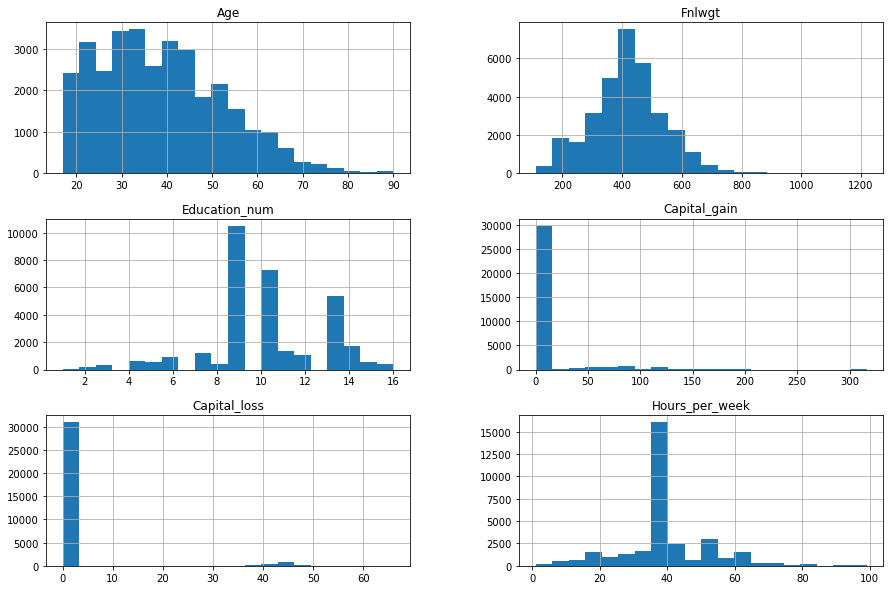

In [36]:
#display histogram of all columns after remove skewness.
df.hist(figsize=(15,10), layout=(3,2), sharex=False, bins=20)

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

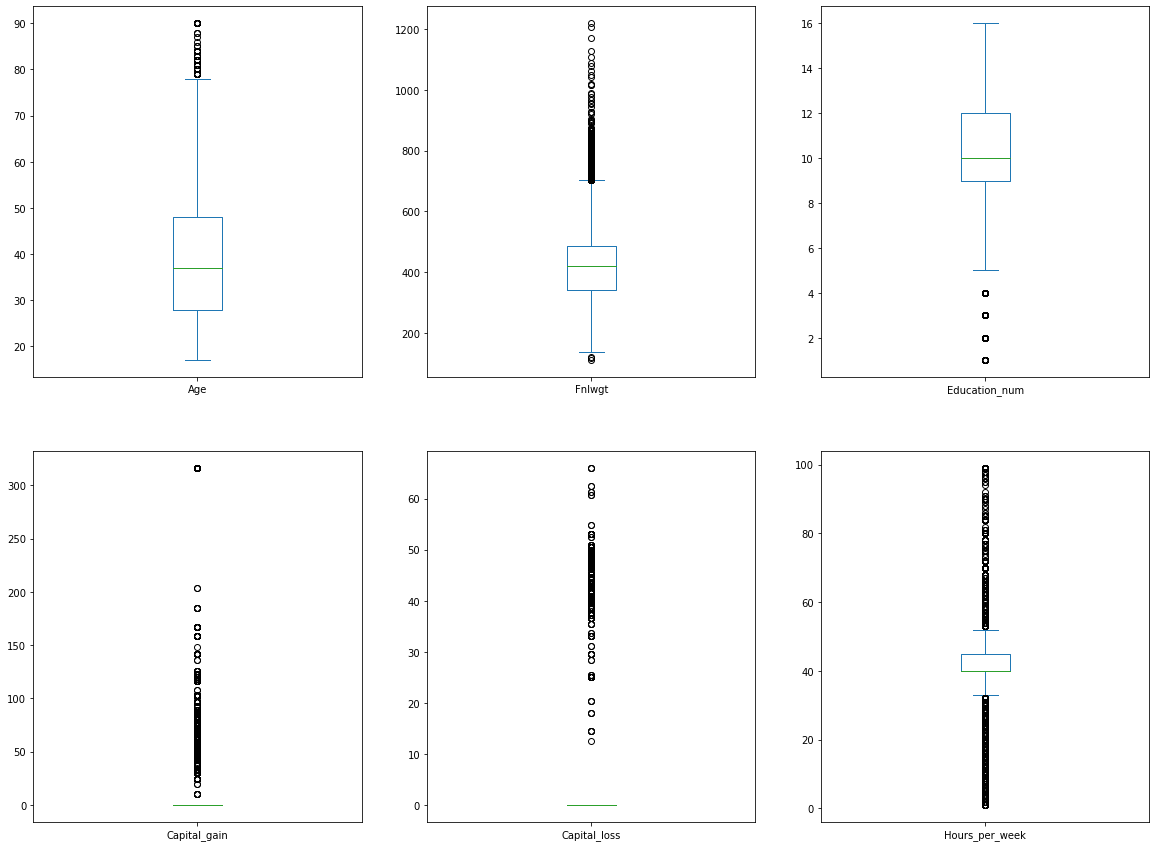

In [37]:
#checking outliers with boxplot.
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(20,15))

In [38]:
#create dataframe for numeric column
numeric_data = df.select_dtypes(include=[np.number])
numeric_data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,288.636450,13,0.000000,0.0,13
1,38,464.377002,9,0.000000,0.0,40
2,53,484.480134,7,0.000000,0.0,40
3,28,581.729318,13,0.000000,0.0,40
4,37,533.462276,14,0.000000,0.0,40
...,...,...,...,...,...,...
32555,27,507.249446,12,0.000000,0.0,38
32556,40,392.904569,9,0.000000,0.0,40
32557,58,389.756334,9,0.000000,0.0,40
32558,22,448.876375,9,0.000000,0.0,20


In [39]:
#Lets quantify
from scipy.stats import zscore
(np.abs(zscore(numeric_data))<3).all()

Age               False
Fnlwgt            False
Education_num     False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
dtype: bool

In [40]:
#detecting outliers
from scipy.stats import zscore
z = np.abs(zscore(numeric_data))
print(np.where(z>3))

(array([    7,     9,    22, ..., 32530, 32537, 32559], dtype=int64), array([3, 5, 4, ..., 5, 3, 3], dtype=int64))


In [43]:
#removing outliers
dfnew = df[(z<3).all(axis=1)]
print('dfnew shape = ',dfnew.shape)
df = dfnew
print('df shape = ',df.shape)

dfnew shape =  (29521, 15)
df shape =  (29521, 15)


# Label Encoder

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list1 = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str)) 
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,288.636450,5,13,0,3,0,4,1,0.0,0.0,13,37,0
1,38,3,464.377002,2,9,2,5,1,4,1,0.0,0.0,40,37,0
2,53,3,484.480134,4,7,0,5,0,2,1,0.0,0.0,40,37,0
3,28,3,581.729318,5,13,0,9,5,2,0,0.0,0.0,40,4,0
4,37,3,533.462276,1,14,0,3,5,4,0,0.0,0.0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,3,556.912920,3,10,1,10,1,4,1,0.0,0.0,40,37,0
32555,27,3,507.249446,3,12,0,12,5,4,0,0.0,0.0,38,37,0
32556,40,3,392.904569,2,9,0,6,0,4,1,0.0,0.0,40,37,1
32557,58,3,389.756334,2,9,2,0,4,4,0,0.0,0.0,40,37,0


In [45]:
#check correlation of columns.
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030614,-0.069515,-0.060575,0.031833,-0.076069,-0.002953,-0.266042,0.024342,0.083195,0.100539,0.019739,0.090183,0.000551,0.228389
Workclass,0.030614,1.000000,-0.026891,-0.019111,-0.003261,-0.055606,0.008125,-0.057618,0.044938,0.067814,-0.005412,-0.004491,0.025993,-0.002583,-0.012026
Fnlwgt,-0.069515,-0.026891,1.000000,0.009753,-0.038106,0.011170,-0.006298,0.009928,-0.011606,0.025048,-0.004009,-0.003248,-0.017186,-0.065609,-0.005650
Education,-0.060575,-0.019111,0.009753,1.000000,0.063970,-0.015062,0.038345,-0.000142,-0.002678,0.001193,0.007087,-0.002772,-0.025714,-0.030980,0.020967
Education_num,0.031833,-0.003261,-0.038106,0.063970,1.000000,-0.074919,0.067225,-0.089509,0.025611,0.002552,0.078156,0.003092,0.142798,0.061204,0.301595
Marital_status,-0.076069,-0.055606,0.011170,-0.015062,-0.074919,1.000000,-0.031512,0.469706,-0.079069,-0.449230,-0.100636,0.036425,-0.152597,0.002629,-0.369374
Occupation,-0.002953,0.008125,-0.006298,0.038345,0.067225,-0.031512,1.000000,-0.035996,-0.002578,0.049783,0.002751,-0.000770,-0.023831,-0.000350,0.028899
Relationship,-0.266042,-0.057618,0.009928,-0.000142,-0.089509,0.469706,-0.035996,1.000000,-0.115739,-0.574195,-0.075098,0.032471,-0.254212,-0.010799,-0.241538
Race,0.024342,0.044938,-0.011606,-0.002678,0.025611,-0.079069,-0.002578,-0.115739,1.000000,0.089026,0.023703,-0.002648,0.043867,0.114398,0.071552
Sex,0.083195,0.067814,0.025048,0.001193,0.002552,-0.449230,0.049783,-0.574195,0.089026,1.000000,0.060894,-0.028947,0.230710,0.002495,0.207147


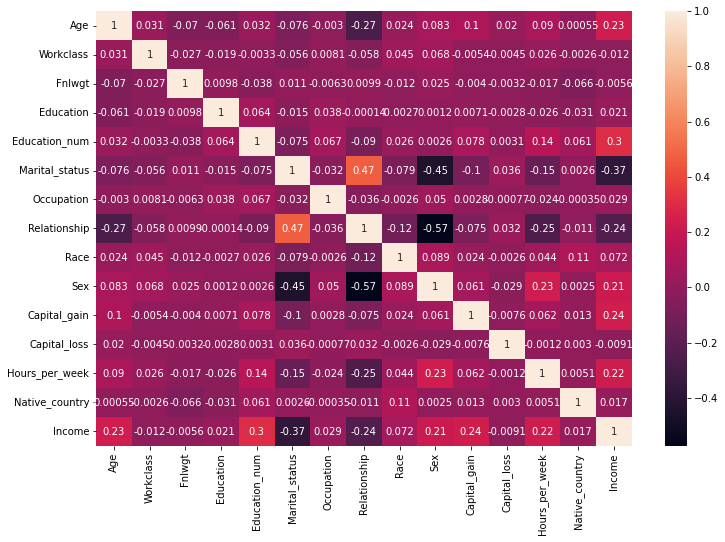

In [46]:
#check correlation matrix with heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
#sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Observation - Hours_per_week and Age and Capital gain is highly correlate with Income (target variable) means if hours per week is more the income is more.

# MultiCollinearity with Variance Inflation Factor (VIF)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
x = df.drop(columns=['Income'],axis=1)
y = df['Income']

In [49]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [50]:
calc_vif()

          Features  VIF Factor
0              Age    9.038451
1        Workclass    8.378322
2           Fnlwgt   12.045825
3        Education    7.097267
4    Education_num   17.203088
5   Marital_status    2.698245
6       Occupation    3.326408
7     Relationship    3.028177
8             Race   18.133627
9              Sex    4.591934
10    Capital_gain    1.091616
11    Capital_loss    1.003299
12  Hours_per_week   14.075922
13  Native_country   29.160069


# Data Preprocessing

In [51]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,288.636450,5,13,0,3,0,4,1,0.0,0.0,13,37
1,38,3,464.377002,2,9,2,5,1,4,1,0.0,0.0,40,37
2,53,3,484.480134,4,7,0,5,0,2,1,0.0,0.0,40,37
3,28,3,581.729318,5,13,0,9,5,2,0,0.0,0.0,40,4
4,37,3,533.462276,1,14,0,3,5,4,0,0.0,0.0,40,37


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [53]:
print(x.shape, y.shape)

(29521, 14) (29521,)


# Scaling the data

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
st = StandardScaler()
x = st.fit_transform(x)
x

array([[ 9.01990720e-01,  1.73699478e+00, -1.10541156e+00, ...,
        -2.96037288e-02, -2.40995645e+00,  2.58584237e-01],
       [ 1.72047851e-03, -7.52626117e-02,  4.06703598e-01, ...,
        -2.96037288e-02,  1.91078455e-02,  2.58584237e-01],
       [ 1.12705828e+00, -7.52626117e-02,  5.79675913e-01, ...,
        -2.96037288e-02,  1.91078455e-02,  2.58584237e-01],
       ...,
       [ 1.51765519e-01, -7.52626117e-02, -2.08262888e-01, ...,
        -2.96037288e-02,  1.91078455e-02,  2.58584237e-01],
       [ 1.50217088e+00, -7.52626117e-02, -2.35351075e-01, ...,
        -2.96037288e-02,  1.91078455e-02,  2.58584237e-01],
       [-1.19863984e+00, -7.52626117e-02,  2.73332371e-01, ...,
        -2.96037288e-02, -1.78019904e+00,  2.58584237e-01]])

# Since the outcome has only two variables we will use binary classification model.

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.svm import SVC
svc = SVC()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training process begins

Finding best random_state with different models

In [58]:
model = [lr,rfc,dtc,svc,gnb]

maxAccu = 0
maxRS = 0

for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = i)
    for m in model:
        m.fit(x_train,y_train)
        pred_test = m.predict(x_test)
        acc = accuracy_score(y_test, pred_test)
        print('accuracy score of', m , 'is :-', acc, 'on random_state', i)
        
    print('\n')
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

accuracy score of LogisticRegression() is :- 0.8342082980524979 on random_state 1
accuracy score of RandomForestClassifier() is :- 0.8472480948348857 on random_state 1
accuracy score of DecisionTreeClassifier() is :- 0.8074513124470788 on random_state 1
accuracy score of SVC() is :- 0.8414902624894157 on random_state 1
accuracy score of GaussianNB() is :- 0.802878916172735 on random_state 1


accuracy score of LogisticRegression() is :- 0.8282811176968671 on random_state 2
accuracy score of RandomForestClassifier() is :- 0.8436917866215072 on random_state 2
accuracy score of DecisionTreeClassifier() is :- 0.8001693480101609 on random_state 2
accuracy score of SVC() is :- 0.8399661303979679 on random_state 2
accuracy score of GaussianNB() is :- 0.7913632514817951 on random_state 2


accuracy score of LogisticRegression() is :- 0.8413209144792548 on random_state 3
accuracy score of RandomForestClassifier() is :- 0.8535139712108383 on random_state 3
accuracy score of DecisionTreeClassifie

accuracy score of SVC() is :- 0.8545300592718036 on random_state 21
accuracy score of GaussianNB() is :- 0.7964436917866216 on random_state 21


accuracy score of LogisticRegression() is :- 0.8367485182049111 on random_state 22
accuracy score of RandomForestClassifier() is :- 0.8543607112616427 on random_state 22
accuracy score of DecisionTreeClassifier() is :- 0.8022015241320914 on random_state 22
accuracy score of SVC() is :- 0.8474174428450466 on random_state 22
accuracy score of GaussianNB() is :- 0.8111769686706182 on random_state 22


accuracy score of LogisticRegression() is :- 0.8262489415749364 on random_state 23
accuracy score of RandomForestClassifier() is :- 0.8482641828958509 on random_state 23
accuracy score of DecisionTreeClassifier() is :- 0.7996613039796783 on random_state 23
accuracy score of SVC() is :- 0.8381033022861981 on random_state 23
accuracy score of GaussianNB() is :- 0.7856054191363252 on random_state 23


accuracy score of LogisticRegression() is :- 0.8314

accuracy score of RandomForestClassifier() is :- 0.8550381033022862 on random_state 42
accuracy score of DecisionTreeClassifier() is :- 0.808467400508044 on random_state 42
accuracy score of SVC() is :- 0.8497883149872989 on random_state 42
accuracy score of GaussianNB() is :- 0.8123624047417443 on random_state 42


accuracy score of LogisticRegression() is :- 0.8392887383573243 on random_state 43
accuracy score of RandomForestClassifier() is :- 0.8484335309060118 on random_state 43
accuracy score of DecisionTreeClassifier() is :- 0.7991532599491956 on random_state 43
accuracy score of SVC() is :- 0.8514817950889078 on random_state 43
accuracy score of GaussianNB() is :- 0.7911939034716342 on random_state 43


accuracy score of LogisticRegression() is :- 0.8433530906011855 on random_state 44
accuracy score of RandomForestClassifier() is :- 0.8545300592718036 on random_state 44
accuracy score of DecisionTreeClassifier() is :- 0.8069432684165961 on random_state 44
accuracy score of SVC()

In [60]:
print("Best accuracy is ", maxAccu, "on random_state ", maxRS)

Best accuracy is  0.8177815410668925 on random_state  44


# Creating train-test split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 8)

In [62]:
x_train

array([[-0.82352724, -1.88752   ,  0.53056506, ..., -0.02960373,
         0.01910785,  0.25858424],
       [ 0.52687812, -0.07526261, -0.83821504, ..., -0.02960373,
         0.01910785,  0.25858424],
       [-0.37339212, -0.07526261,  1.19887139, ..., -0.02960373,
         0.01910785,  0.25858424],
       ...,
       [ 0.67692316,  1.73699478, -2.19765443, ..., -0.02960373,
         0.01910785,  0.25858424],
       [ 0.4518556 , -0.07526261,  0.20988127, ..., -0.02960373,
        -0.43071888,  0.25858424],
       [-0.6734822 , -0.07526261, -0.82600957, ..., -0.02960373,
        -0.8805456 , -5.92544217]])

In [63]:
x_test

array([[ 1.80226096e+00, -7.52626117e-02, -1.48922561e-01, ...,
        -2.96037288e-02, -1.42033766e+00,  2.58584237e-01],
       [-8.23527243e-01, -7.52626117e-02,  2.60404332e-02, ...,
        -2.96037288e-02,  1.91078455e-02,  2.58584237e-01],
       [-7.33020416e-02, -2.79364870e+00, -1.68857960e+00, ...,
        -2.96037288e-02,  1.91078455e-02,  2.58584237e-01],
       ...,
       [-2.98369602e-01,  8.30866083e-01, -1.16156754e+00, ...,
        -2.96037288e-02,  1.81841473e+00,  2.58584237e-01],
       [-3.73392122e-01, -7.52626117e-02, -2.25953385e+00, ...,
        -2.96037288e-02, -7.00614908e-01,  2.58584237e-01],
       [ 1.72047851e-03, -7.52626117e-02, -6.53891340e-01, ...,
        -2.96037288e-02,  1.91078455e-02, -1.28742236e+00]])

In [64]:
y_train

18269    1
27000    0
7897     0
20247    1
21971    0
        ..
2422     0
29742    0
20306    1
28600    1
5029     0
Name: Income, Length: 23616, dtype: int32

In [65]:
print(x.shape, x_train.shape, x_test.shape)

(29521, 14) (23616, 14) (5905, 14)


In [66]:
print(y.shape, y_train.shape, y_test.shape)

(29521,) (23616,) (5905,)


In [67]:
lr.fit(x_train,y_train)

LogisticRegression()

In [68]:
pred = lr.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is: 0.8448772226926333
[[4406  250]
 [ 666  583]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4656
           1       0.70      0.47      0.56      1249

    accuracy                           0.84      5905
   macro avg       0.78      0.71      0.73      5905
weighted avg       0.83      0.84      0.83      5905



In [69]:
from sklearn.metrics import f1_score
print('F1 score is: ', f1_score(y_test, pred))

F1 score is:  0.5600384245917387


# Cross Validation for GaussianNB

In [70]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for i in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 83.67603742852008
accuracy_score is :- 84.48772226926333


At cv:- 3
cross validation score is :- 83.75056418738153
accuracy_score is :- 84.48772226926333


At cv:- 4
cross validation score is :- 83.68280970440108
accuracy_score is :- 84.48772226926333


At cv:- 5
cross validation score is :- 83.77766935374687
accuracy_score is :- 84.48772226926333


At cv:- 6
cross validation score is :- 83.68621578666507
accuracy_score is :- 84.48772226926333


At cv:- 7
cross validation score is :- 83.67943248002655
accuracy_score is :- 84.48772226926333


At cv:- 8
cross validation score is :- 83.69299471577756
accuracy_score is :- 84.48772226926333


At cv:- 9
cross validation score is :- 83.699760012687
accuracy_score is :- 84.48772226926333




In [71]:
lsscore_selected = cross_val_score(lr,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8367943248002655 
The accuracy score is:  0.8448772226926333


# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2'], 
              'C':[0.001, 0.01, 0.1, 1, 10, 100]
             }

In [77]:
GCV = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv= 7, scoring = 'accuracy')
GCV.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [85]:
print("tuned hpyerparameters :(best parameters) ",GCV.best_params_)
print("accuracy :",GCV.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8364250289034451


In [88]:
lr = LogisticRegression(random_state=8, penalty = 'l2', C=0.01)
lr.fit(x_train,y_train)

LogisticRegression(C=0.01, random_state=8)

In [89]:
pred=lr.predict(x_test)
print("Accuracy for LogisticRegression on CV data: ",accuracy_score(y_test,pred))

Accuracy for LogisticRegression on CV data:  0.8452159187129551


# AUC ROC Curve

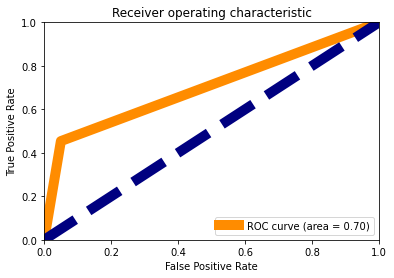

In [98]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [99]:
import pickle
filename = 'census_income.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [102]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_comp

,original,predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
5900,0,0
5901,0,0
5902,0,0
5903,0,0
